In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings("ignore")

1. Read the dataset and view the first 10 rows of it. 

In [2]:
df = pd.read_csv("healthcare-dataset-stroke-data.csv")
df.head(10)

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
5,56669,Male,81.0,0,0,Yes,Private,Urban,186.21,29.0,formerly smoked,1
6,53882,Male,74.0,1,1,Yes,Private,Rural,70.09,27.4,never smoked,1
7,10434,Female,69.0,0,0,No,Private,Urban,94.39,22.8,never smoked,1
8,27419,Female,59.0,0,0,Yes,Private,Rural,76.15,NaN,Unknown,1
9,60491,Female,78.0,0,0,Yes,Private,Urban,58.57,24.2,Unknown,1


2. Check the shape/dimension of the dataset 

In [3]:
df.shape

(5110, 12)

In [4]:
print("The number of rows in the given dataset is :", df.shape[0])
print("The number of columns in the given dataset is :", df.shape[1])

The number of rows in the given dataset is : 5110
The number of columns in the given dataset is : 12


3. Check for the missing values.Display number of missing values per column

In [5]:
df.isnull().sum()

id                     0
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

Only missing values are present in the column "bmi" and there are 201 missing values.

4. Investigate and predict the missing BMI Value. 

In [6]:
df["bmi"].fillna(value = df["bmi"].median(), inplace = True)

In [7]:
df.isnull().sum()

id                   0
gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64

Replaced the missing values with median of the entire data

5. Check the datatype, number of non null values and name of each variable in the dataset. 

In [8]:
df.dtypes

id                     int64
gender                object
age                  float64
hypertension           int64
heart_disease          int64
ever_married          object
work_type             object
Residence_type        object
avg_glucose_level    float64
bmi                  float64
smoking_status        object
stroke                 int64
dtype: object

6. Check the descriptive statistics of the dataset. 

In [9]:
df.describe()

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000
mean,36517.829354,43.226614,0.097456,0.054012,106.147677,28.862035,0.048728
std,21161.721625,22.612647,0.296607,0.226063,45.283560,7.699562,0.215320
min,67.000000,0.080000,0.000000,0.000000,55.120000,10.300000,0.000000
25%,17741.250000,25.000000,0.000000,0.000000,77.245000,23.800000,0.000000
50%,36932.000000,45.000000,0.000000,0.000000,91.885000,28.100000,0.000000
75%,54682.000000,61.000000,0.000000,0.000000,114.090000,32.800000,0.000000
max,72940.000000,82.000000,1.000000,1.000000,271.740000,97.600000,1.000000


7. Visualize the proportion of Stroke samples in the dataset. 

In [10]:
df["stroke"].value_counts()

0    4861
1     249
Name: stroke, dtype: int64

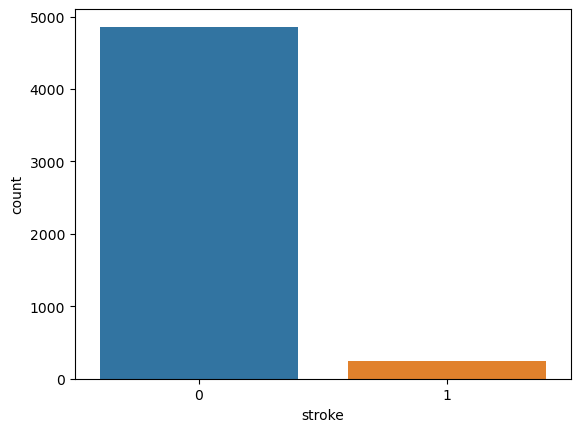

In [11]:
sns.countplot(x = df["stroke"])
plt.show()

8. Visualize the Distribution of Male and Female Ages. Write the Observation. 

In [12]:
df["gender"].unique()

array(['Male', 'Female', 'Other'], dtype=object)

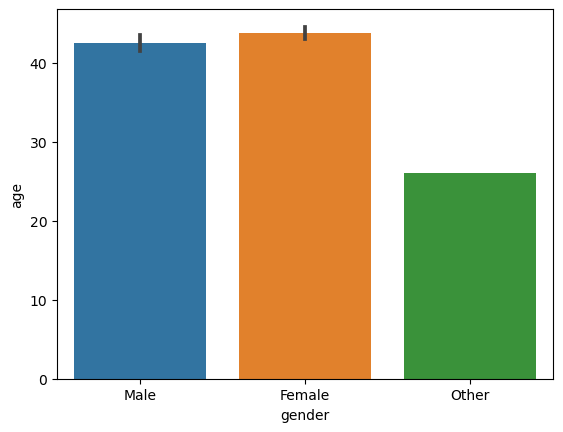

In [13]:
sns.barplot(data = df, x = df["gender"], y = df["age"])
plt.show()

10. Visualize the stroke sample based on 

    a) BMI and Glucose Level 
    
    b) BMI and Age 

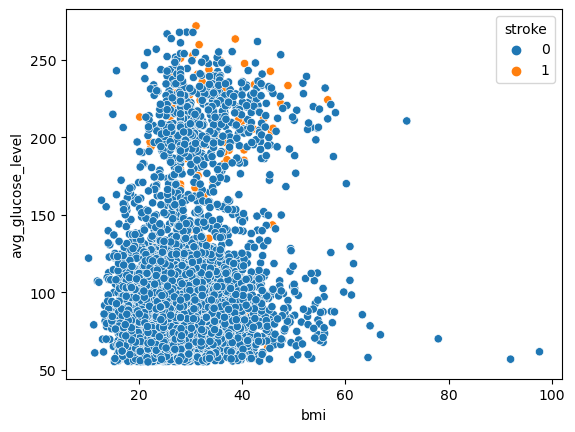

In [14]:
sns.scatterplot(x = df["bmi"], y = df["avg_glucose_level"], hue = df["stroke"])
plt.show()

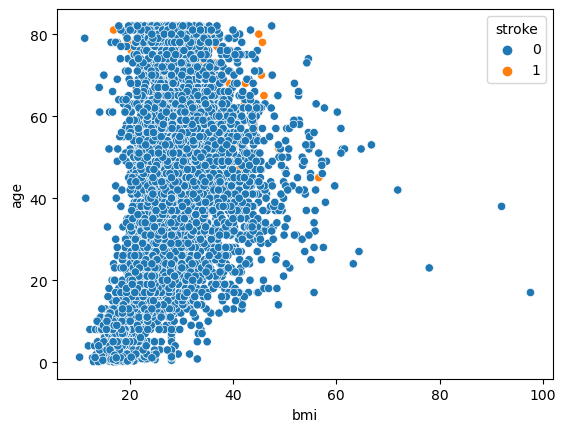

In [15]:
sns.scatterplot(x = df["bmi"], y = df["age"], hue = df["stroke"])
plt.show()

11. Using the pie chart visualizes the proportion of different smoking categories among the stroke population. 

In [16]:
df.groupby("smoking_status")["stroke"].value_counts()

smoking_status   stroke
Unknown          0         1497
                 1           47
formerly smoked  0          815
                 1           70
never smoked     0         1802
                 1           90
smokes           0          747
                 1           42
Name: stroke, dtype: int64

<Axes: >

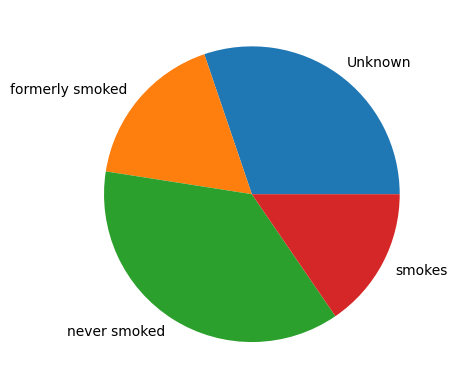

In [17]:
df.groupby("smoking_status").size().plot(kind = "pie")

12. Perform hypothesis testing to find the significant variables. 

In [18]:
from scipy import stats

In [19]:
df_num = df.select_dtypes(include = np.number)
df_cat = df.select_dtypes(include = np.object)

In [20]:
df["stroke"].value_counts()

0    4861
1     249
Name: stroke, dtype: int64

In [21]:
zero = df[df["stroke"] == 0].drop('stroke', axis = 1)
one = df[df["stroke"] == 1].drop('stroke', axis = 1)

In [22]:
zero.shape

(4861, 11)

In [23]:
one.shape

(249, 11)

H0: The numerical variables are normally distributed

Ha: The numerical variables are not normally distributed

In [24]:
for i in df_num.drop('stroke', axis = 1).columns:
    print("Zero", i, stats.shapiro(zero[i]));
    print("One", i, stats.shapiro(one[i]));

Zero id ShapiroResult(statistic=0.9536995887756348, pvalue=1.0379210108873446e-36)
One id ShapiroResult(statistic=0.9446319341659546, pvalue=4.21573957964938e-08)
Zero age ShapiroResult(statistic=0.9704752564430237, pvalue=1.6263547388824356e-30)
One age ShapiroResult(statistic=0.8781338334083557, pvalue=3.1740154124784703e-13)
Zero hypertension ShapiroResult(statistic=0.3195730447769165, pvalue=0.0)
One hypertension ShapiroResult(statistic=0.5506410598754883, pvalue=7.413848400582891e-25)
Zero heart_disease ShapiroResult(statistic=0.21538954973220825, pvalue=0.0)
One heart_disease ShapiroResult(statistic=0.4767826199531555, pvalue=1.802671352392826e-26)
Zero avg_glucose_level ShapiroResult(statistic=0.803642988204956, pvalue=0.0)
One avg_glucose_level ShapiroResult(statistic=0.8712369203567505, pvalue=1.232048588584861e-13)
Zero bmi ShapiroResult(statistic=0.9503265619277954, pvalue=9.855727826282764e-38)
One bmi ShapiroResult(statistic=0.9248184561729431, pvalue=6.426703058615146e-10

All numerical variables are not normally distributed

H0: The variance among groups are equal

Ha: The variance among groups are not equal

In [25]:
for i in df_num.drop('stroke', axis = 1).columns:
    print(i, stats.levene(zero[i], one[i]))

id LeveneResult(statistic=0.6552173694838374, pvalue=0.41829119012862936)
age LeveneResult(statistic=129.73660960413392, pvalue=1.0651819334659263e-29)
hypertension LeveneResult(statistic=84.95354215995654, pvalue=4.3675567699797555e-20)
heart_disease LeveneResult(statistic=94.69840601636669, pvalue=3.4519273717538474e-22)
avg_glucose_level LeveneResult(statistic=94.10850460562769, pvalue=4.625275752785231e-22)
bmi LeveneResult(statistic=23.706853251400698, pvalue=1.1556419581806115e-06)


The variance among groups are not equal

H0: Independent and target variable are Independent of each other

Ha: Independent and target variable are dependent

In [26]:
for i in df_num.drop('stroke', axis = 1).columns:
    print(i, stats.mannwhitneyu(zero[i], one[i]))

id MannwhitneyuResult(statistic=594647.0, pvalue=0.6422754428825589)
age MannwhitneyuResult(statistic=200263.5, pvalue=3.726634665900011e-71)
hypertension MannwhitneyuResult(statistic=498565.5, pvalue=6.120973948168256e-20)
heart_disease MannwhitneyuResult(statistic=519471.5, pvalue=5.2510318536289465e-22)
avg_glucose_level MannwhitneyuResult(statistic=471239.0, pvalue=3.6403672710893236e-09)
bmi MannwhitneyuResult(statistic=522642.5, pvalue=0.00027690391864726487)


Except id all the other numerical columns are dependent variable

H0: The two variables have no significant difference

Ha: The two variables have significant difference

In [27]:
for i in df_cat.columns:
    tbl = pd.crosstab(df[i], df["stroke"])
    teststat, pvalue, dof, exp = stats.chi2_contingency(tbl)
    print("Pvalue for", i, "is", pvalue)

Pvalue for gender is 0.7895490538408245
Pvalue for ever_married is 1.6389021142314745e-14
Pvalue for work_type is 5.397707801896119e-10
Pvalue for Residence_type is 0.29833169286876987
Pvalue for smoking_status is 2.0853997025008455e-06


Except for Gender and Residence type, all other categorical columns have significant difference.

13. Drop the unnecessary columns.

In [28]:
df.drop(['id', 'gender', 'Residence_type'], axis = 1, inplace = True)

In [29]:
df.shape

(5110, 9)

14. Write the code to replace following categories columns in integer format as follows:

    a) work_type('Private':0,'Selfemployed':1,'Govt_job':2,'children':1,'Never_worked':-2)
    
    b) ever_married('Yes': 1, 'No': 0) 
    
    c) smoking_status('never smoked':0,'Unknown':1,'formerly smoked':2,'smokes':-1)

In [30]:
df["work_type"].replace({'Private':0,'Self-employed':1,'Govt_job':2,'children':-1,'Never_worked':-2}, inplace = True)

In [31]:
df["ever_married"].replace({'Yes': 1, 'No': 0}, inplace = True)

In [32]:
df["smoking_status"].replace({'never smoked':0,'Unknown':1,'formerly smoked':2,'smokes':-1}, inplace = True)

In [33]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   age                5110 non-null   float64
 1   hypertension       5110 non-null   int64  
 2   heart_disease      5110 non-null   int64  
 3   ever_married       5110 non-null   int64  
 4   work_type          5110 non-null   int64  
 5   avg_glucose_level  5110 non-null   float64
 6   bmi                5110 non-null   float64
 7   smoking_status     5110 non-null   int64  
 8   stroke             5110 non-null   int64  
dtypes: float64(3), int64(6)
memory usage: 359.4 KB


15. Check the distribution of 'bmi' and 'stroke' columns in the dataset. 

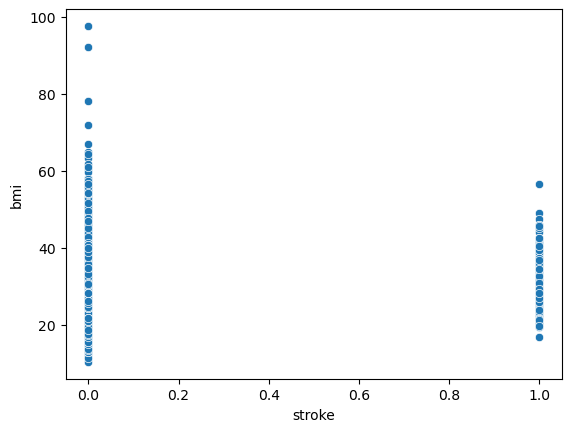

In [34]:
sns.scatterplot(x = df["stroke"], y= df["bmi"])
plt.show()

16. List down columns that are highly skewed.

In [35]:
df.skew()

age                 -0.137059
hypertension         2.715392
heart_disease        3.947244
ever_married        -0.657745
work_type            0.585971
avg_glucose_level    1.572284
bmi                  1.088187
smoking_status       0.082279
stroke               4.193284
dtype: float64

17. List down the columns that are highly kurtosis.

In [36]:
df.kurtosis()

age                  -0.991010
hypertension          5.375456
heart_disease        13.586052
ever_married         -1.567985
work_type            -0.059562
avg_glucose_level     1.680479
bmi                   3.635306
smoking_status       -0.922415
stroke               15.589736
dtype: float64

18. Find the distribution of all variables with respect to the outcome 'stroke' variable.

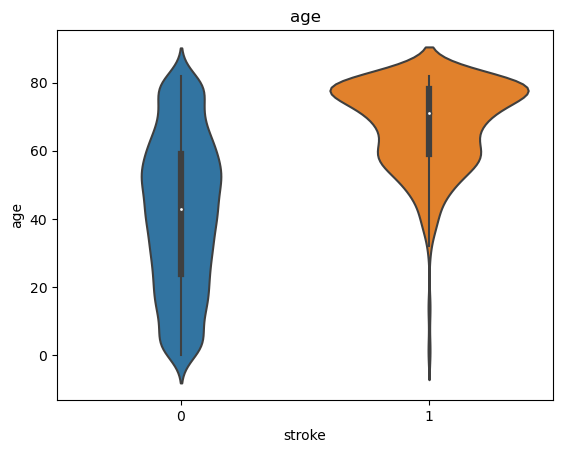

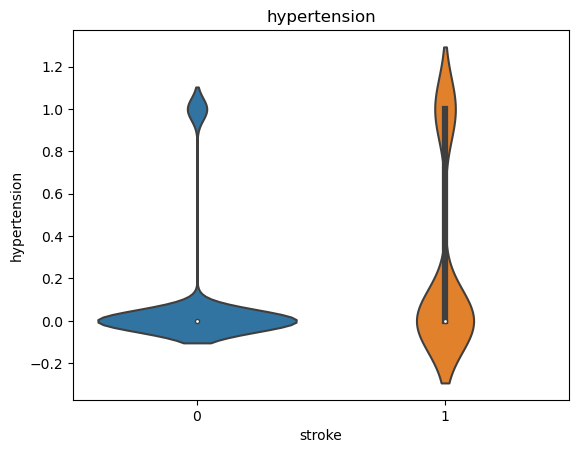

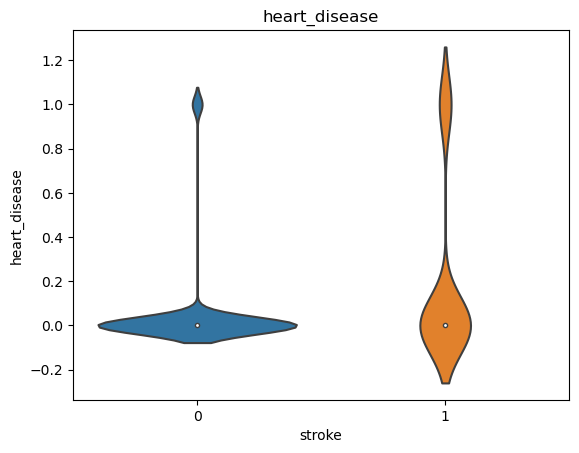

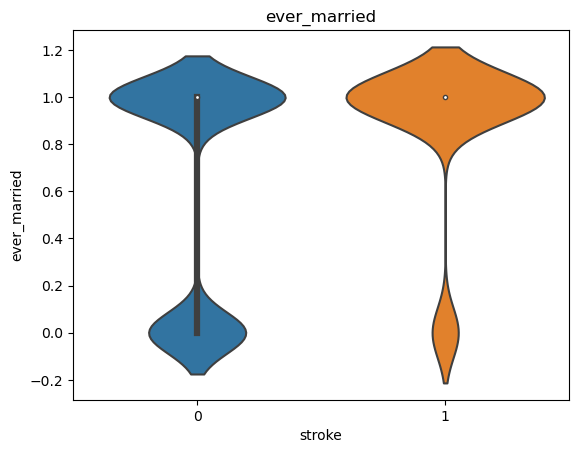

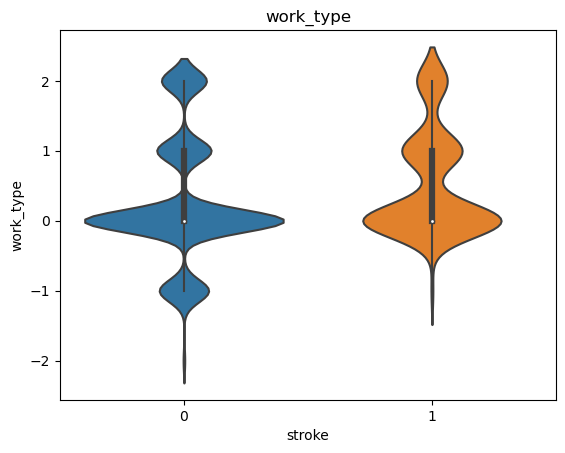

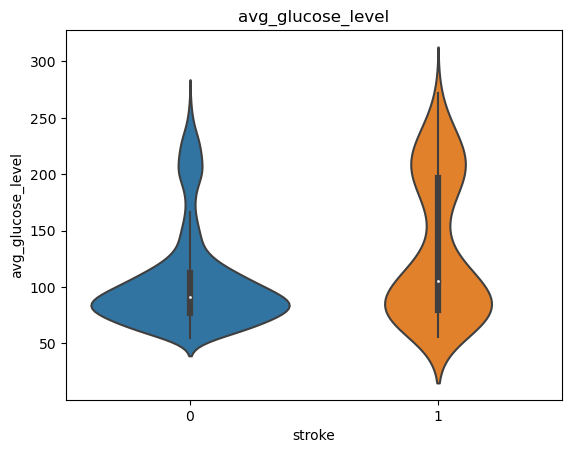

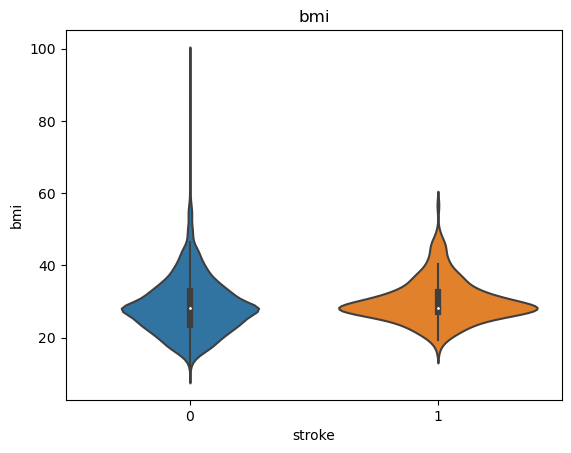

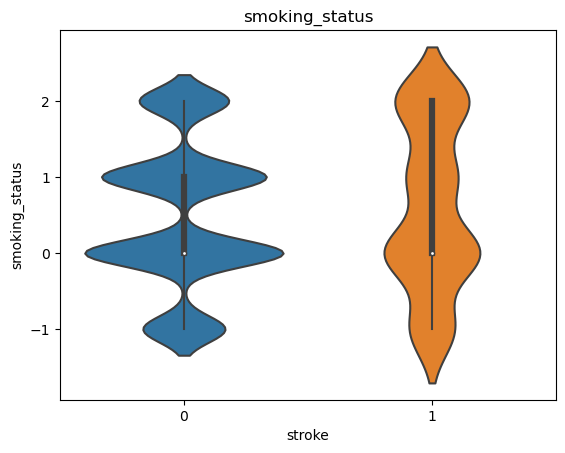

In [37]:
for i in df.drop("stroke",axis = 1).columns:
    sns.violinplot(data = df, x = "stroke", y = i)
    plt.title(i)
    plt.show()

19. Plot the heatmap for correlation matrix for the given dataset. Write the observation. Especially note down columns that are highly correlated (Positive or negative correlation, consider 0.7 to 1 as high) 

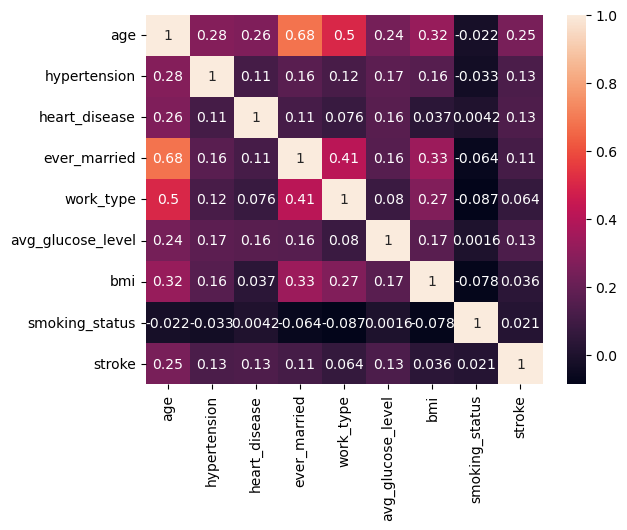

In [38]:
sns.heatmap(df.corr(), annot = True)
plt.show()

20. Split the dataset randomly into train and test dataset. Use a train ratio of 70:30 ratio. 

In [39]:
X = df.drop('stroke', axis =1)
y = df['stroke']

In [40]:
from sklearn.model_selection import train_test_split

In [41]:
Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, test_size = 0.3, random_state = 0)

In [42]:
print(Xtrain.shape)
print(Xtest.shape)
print(ytrain.shape)
print(ytest.shape)

(3577, 8)
(1533, 8)
(3577,)
(1533,)


21. Check the dataset is balanced or imbalanced. If it is highly investigated, a different approach to balanced the dataset by using the correct technique. 

In [43]:
df["stroke"].value_counts()

0    4861
1     249
Name: stroke, dtype: int64

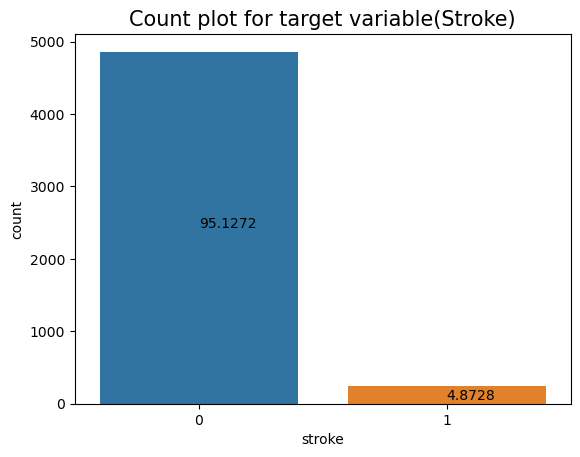

In [44]:
sns.countplot(x = df["stroke"])

plt.title("Count plot for target variable(Stroke)", fontsize = 15)

plt.text(x = 0, y = 2430, s = round((df["stroke"].value_counts()[0]/df.shape[0]) * 100, 4))
plt.text(x = 1, y = 50, s = round((df["stroke"].value_counts()[1]/df.shape[0]) * 100, 4))

plt.show()

Highly imbalanced data

We need to do the SMOTE analysis.

In [45]:
ytrain.value_counts()

0    3404
1     173
Name: stroke, dtype: int64

In [46]:
from imblearn.over_sampling import SMOTE

In [47]:
smote = SMOTE(sampling_strategy = 0.50, random_state = 0)
Xtrain_sm, ytrain_sm = smote.fit_resample(Xtrain, ytrain)

In [48]:
ytrain_sm.value_counts()

0    3404
1    1702
Name: stroke, dtype: int64

22. **Model Selection/hyperparameter tuning**

    Try different models and fine tune their performance until you get the desired level of performance on the given dataset.  
    
    **Model Evaluation**
    
    Evaluate the models using appropriate evaluation metrics.

In [49]:
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score

In [50]:
smote_model_score = pd.DataFrame(columns=["Model", "Accuracy", "F1 Score", "Precision", "Recall"])

In [51]:
def smote_score(model, ytest, ypred):
    global smote_model_score
    acc = accuracy_score(ytest, ypred)
    f1 = f1_score(ytest, ypred)
    pres = precision_score(ytest, ypred)
    recall = recall_score(ytest, ypred)
    smote_model_score = smote_model_score.append({"Model":model,"Accuracy":acc,"F1 Score":f1,"Precision":pres,"Recall":recall},
                                     ignore_index=True)
    return smote_model_score

    1. Logistic Regression

Scaling

In [52]:
from sklearn.preprocessing import StandardScaler

In [53]:
ss = StandardScaler()
Xtrain_sm_sc = ss.fit_transform(Xtrain_sm)
Xtest_sc = ss.transform(Xtest)

Model Building

In [54]:
from sklearn.linear_model import LogisticRegression

In [55]:
lr = LogisticRegression(random_state = 0)
lr.fit(Xtrain_sm_sc, ytrain_sm)

LogisticRegression(random_state=0)

In [56]:
ypred_lr = (lr.predict_proba(Xtest_sc)[:, 1] >= 0.5).astype(int)
ypred_lr

array([1, 0, 0, ..., 0, 1, 0])

In [57]:
from sklearn.metrics import classification_report

In [58]:
print(classification_report(ytest, ypred_lr))

              precision    recall  f1-score   support

           0       0.97      0.87      0.92      1457
           1       0.15      0.45      0.23        76

    accuracy                           0.85      1533
   macro avg       0.56      0.66      0.57      1533
weighted avg       0.93      0.85      0.88      1533



In [59]:
from sklearn.metrics import confusion_matrix

In [60]:
print(confusion_matrix(ytest, ypred_lr))

[[1268  189]
 [  42   34]]


In [61]:
smote_score("Logistic Regression", ytest, ypred_lr)

,Model,Accuracy,F1 Score,Precision,Recall
0,Logistic Regression,0.849315,0.227425,0.152466,0.447368


    2. K Neighbors Classifier

In [62]:
from sklearn.neighbors import KNeighborsClassifier

In [63]:
knn = KNeighborsClassifier()
knn_model = knn.fit(Xtrain_sm_sc, ytrain_sm)

In [64]:
ypred_knn = (knn_model.predict_proba(Xtest_sc)[:, 1] >= 0.5).astype(int)
ypred_knn

array([1, 0, 0, ..., 0, 1, 0])

In [65]:
print(classification_report(ytest, ypred_knn))

              precision    recall  f1-score   support

           0       0.96      0.87      0.92      1457
           1       0.13      0.36      0.19        76

    accuracy                           0.85      1533
   macro avg       0.55      0.61      0.55      1533
weighted avg       0.92      0.85      0.88      1533



In [66]:
print(confusion_matrix(ytest, ypred_knn))

[[1273  184]
 [  49   27]]


In [67]:
smote_score("K Neighbors Classifier", ytest, ypred_knn)

,Model,Accuracy,F1 Score,Precision,Recall
0,Logistic Regression,0.849315,0.227425,0.152466,0.447368
1,K Neighbors Classifier,0.848010,0.188153,0.127962,0.355263


    3. Gaussian NB

In [68]:
from sklearn.naive_bayes import GaussianNB

In [69]:
gnb = GaussianNB()
gnb_model = gnb.fit(Xtrain_sm_sc, ytrain_sm)

In [70]:
ypred_gnb = (gnb_model.predict_proba(Xtest_sc)[:, 1] >= 0.5).astype(int)
ypred_gnb

array([1, 0, 1, ..., 0, 0, 0])

In [71]:
print(classification_report(ytest, ypred_gnb))

              precision    recall  f1-score   support

           0       0.97      0.79      0.87      1457
           1       0.12      0.58      0.21        76

    accuracy                           0.78      1533
   macro avg       0.55      0.68      0.54      1533
weighted avg       0.93      0.78      0.84      1533



In [72]:
print(confusion_matrix(ytest, ypred_gnb))

[[1148  309]
 [  32   44]]


In [73]:
smote_score("Gaussian NB Classifier", ytest, ypred_gnb)

,Model,Accuracy,F1 Score,Precision,Recall
0,Logistic Regression,0.849315,0.227425,0.152466,0.447368
1,K Neighbors Classifier,0.848010,0.188153,0.127962,0.355263
2,Gaussian NB Classifier,0.777560,0.205128,0.124646,0.578947


    3. Decision Tree Classifier - Gini

In [74]:
from sklearn.tree import DecisionTreeClassifier

In [75]:
dt = DecisionTreeClassifier(random_state = 0)
dt_model = dt.fit(Xtrain_sm_sc, ytrain_sm)

In [76]:
ypred_dt = dt_model.predict(Xtest_sc)
ypred_dt

array([0, 0, 1, ..., 0, 0, 0], dtype=int64)

In [77]:
print(classification_report(ytest, ypred_dt))

              precision    recall  f1-score   support

           0       0.96      0.91      0.93      1457
           1       0.10      0.20      0.14        76

    accuracy                           0.88      1533
   macro avg       0.53      0.55      0.53      1533
weighted avg       0.91      0.88      0.89      1533



In [78]:
print(confusion_matrix(ytest, ypred_dt))

[[1328  129]
 [  61   15]]


In [79]:
smote_score("Decision Tree Classifier - Gini", ytest, ypred_dt)

,Model,Accuracy,F1 Score,Precision,Recall
0,Logistic Regression,0.849315,0.227425,0.152466,0.447368
1,K Neighbors Classifier,0.848010,0.188153,0.127962,0.355263
2,Gaussian NB Classifier,0.777560,0.205128,0.124646,0.578947
3,Decision Tree Classifier - Gini,0.876060,0.136364,0.104167,0.197368


    4. Decision Tree Classifier - Entropy

In [80]:
dt = DecisionTreeClassifier(criterion = "entropy", random_state = 0)
dt_model = dt.fit(Xtrain_sm_sc, ytrain_sm)

In [81]:
ypred_dt = dt_model.predict(Xtest_sc)
ypred_dt

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [82]:
print(classification_report(ytest, ypred_dt))

              precision    recall  f1-score   support

           0       0.95      0.92      0.94      1457
           1       0.08      0.13      0.10        76

    accuracy                           0.88      1533
   macro avg       0.52      0.53      0.52      1533
weighted avg       0.91      0.88      0.90      1533



In [83]:
print(confusion_matrix(ytest, ypred_dt))

[[1344  113]
 [  66   10]]


In [84]:
smote_score("Decision Tree Classifier - Entropy", ytest, ypred_dt)

,Model,Accuracy,F1 Score,Precision,Recall
0,Logistic Regression,0.849315,0.227425,0.152466,0.447368
1,K Neighbors Classifier,0.848010,0.188153,0.127962,0.355263
2,Gaussian NB Classifier,0.777560,0.205128,0.124646,0.578947
3,Decision Tree Classifier - Gini,0.876060,0.136364,0.104167,0.197368
4,Decision Tree Classifier - Entropy,0.883235,0.100503,0.081301,0.131579


    5. Decision Tree Classifier - Tuned

In [85]:
dt = DecisionTreeClassifier(random_state = 0)
dt_params = {"criterion" : ["gini", "entropy"], "max_depth":np.arange(1,11), "min_samples_leaf":np.arange(1,11)}

In [86]:
from sklearn.model_selection import GridSearchCV, KFold

In [87]:
gs_dt = GridSearchCV(estimator = dt, param_grid = dt_params, cv = 5, scoring="neg_root_mean_squared_error")

In [88]:
gs_dt.fit(Xtrain_sm_sc, ytrain_sm)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=0),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10]),
                         'min_samples_leaf': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10])},
             scoring='neg_root_mean_squared_error')

In [89]:
gs_dt.best_params_

{'criterion': 'gini', 'max_depth': 10, 'min_samples_leaf': 2}

In [90]:
dt_tuned = DecisionTreeClassifier(criterion = "gini", max_depth = 10, min_samples_leaf = 2, random_state = 0)
dt_tuned.fit(Xtrain_sm_sc, ytrain_sm)

DecisionTreeClassifier(max_depth=10, min_samples_leaf=2, random_state=0)

In [91]:
ypred_dt = (dt_tuned.predict_proba(Xtest_sc)[:, 1] >= 0.5).astype(int)
ypred_dt

array([0, 0, 1, ..., 0, 0, 0])

In [92]:
print(classification_report(ytest, ypred_dt))

              precision    recall  f1-score   support

           0       0.96      0.87      0.91      1457
           1       0.14      0.39      0.20        76

    accuracy                           0.85      1533
   macro avg       0.55      0.63      0.56      1533
weighted avg       0.92      0.85      0.88      1533



In [93]:
print(confusion_matrix(ytest, ypred_dt))

[[1267  190]
 [  46   30]]


In [94]:
smote_score("Decision Tree Classifier - Tuned", ytest, ypred_dt)

,Model,Accuracy,F1 Score,Precision,Recall
0,Logistic Regression,0.849315,0.227425,0.152466,0.447368
1,K Neighbors Classifier,0.848010,0.188153,0.127962,0.355263
2,Gaussian NB Classifier,0.777560,0.205128,0.124646,0.578947
3,Decision Tree Classifier - Gini,0.876060,0.136364,0.104167,0.197368
4,Decision Tree Classifier - Entropy,0.883235,0.100503,0.081301,0.131579
5,Decision Tree Classifier - Tuned,0.846053,0.202703,0.136364,0.394737


    6. Random Forest classifier

In [95]:
from sklearn.ensemble import RandomForestClassifier

In [96]:
rf = RandomForestClassifier(random_state = 0)
rf.fit(Xtrain_sm_sc, ytrain_sm)

RandomForestClassifier(random_state=0)

In [97]:
ypred_rf = (rf.predict_proba(Xtest_sc)[:, 1] >= 0.5).astype(int)
ypred_rf

array([0, 0, 0, ..., 0, 0, 0])

In [98]:
print(classification_report(ytest, ypred_rf))

              precision    recall  f1-score   support

           0       0.95      0.94      0.95      1457
           1       0.11      0.14      0.12        76

    accuracy                           0.90      1533
   macro avg       0.53      0.54      0.54      1533
weighted avg       0.91      0.90      0.91      1533



In [99]:
print(confusion_matrix(ytest, ypred_rf))

[[1368   89]
 [  65   11]]


In [100]:
smote_score("Random Forest Classifier", ytest, ypred_rf)

,Model,Accuracy,F1 Score,Precision,Recall
0,Logistic Regression,0.849315,0.227425,0.152466,0.447368
1,K Neighbors Classifier,0.848010,0.188153,0.127962,0.355263
2,Gaussian NB Classifier,0.777560,0.205128,0.124646,0.578947
3,Decision Tree Classifier - Gini,0.876060,0.136364,0.104167,0.197368
4,Decision Tree Classifier - Entropy,0.883235,0.100503,0.081301,0.131579
5,Decision Tree Classifier - Tuned,0.846053,0.202703,0.136364,0.394737
6,Random Forest Classifier,0.899543,0.125000,0.110000,0.144737


    7. Random Forest Classifier- Tuned

In [101]:
rf = RandomForestClassifier(random_state = 0)
rf_params = {"criterion" : ["gini", "entropy"], "max_depth" : np.arange(1,11), "min_samples_leaf" : np.arange(1,11)}

In [102]:
gs_rf = GridSearchCV(estimator = rf, param_grid = rf_params, cv = 5, scoring = "neg_root_mean_squared_error")

In [103]:
gs_rf.fit(Xtrain_sm_sc, ytrain_sm)

GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=0),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10]),
                         'min_samples_leaf': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10])},
             scoring='neg_root_mean_squared_error')

In [104]:
gs_rf.best_params_

{'criterion': 'gini', 'max_depth': 10, 'min_samples_leaf': 2}

In [105]:
rf = RandomForestClassifier(n_estimators = 100, criterion = "gini", max_depth = 10, min_samples_leaf = 1, random_state = 0)
rf.fit(Xtrain_sm_sc, ytrain_sm)

RandomForestClassifier(max_depth=10, random_state=0)

In [106]:
ypred_rf = (rf.predict_proba(Xtest_sc)[:, 1] >= 0.5).astype(int)
ypred_rf

array([0, 0, 0, ..., 0, 0, 0])

In [107]:
print(classification_report(ytest, ypred_rf))

              precision    recall  f1-score   support

           0       0.96      0.92      0.94      1457
           1       0.13      0.24      0.17        76

    accuracy                           0.89      1533
   macro avg       0.55      0.58      0.55      1533
weighted avg       0.92      0.89      0.90      1533



In [108]:
print(confusion_matrix(ytest, ypred_rf))

[[1340  117]
 [  58   18]]


In [109]:
smote_score("Random Forest Classifier", ytest, ypred_rf)

,Model,Accuracy,F1 Score,Precision,Recall
0,Logistic Regression,0.849315,0.227425,0.152466,0.447368
1,K Neighbors Classifier,0.848010,0.188153,0.127962,0.355263
2,Gaussian NB Classifier,0.777560,0.205128,0.124646,0.578947
3,Decision Tree Classifier - Gini,0.876060,0.136364,0.104167,0.197368
4,Decision Tree Classifier - Entropy,0.883235,0.100503,0.081301,0.131579
5,Decision Tree Classifier - Tuned,0.846053,0.202703,0.136364,0.394737
6,Random Forest Classifier,0.899543,0.125000,0.110000,0.144737
7,Random Forest Classifier,0.885845,0.170616,0.133333,0.236842


    8. Ada Boost Classifier 

In [110]:
from sklearn.ensemble import AdaBoostClassifier

In [111]:
dt = DecisionTreeClassifier(random_state = 0)
adb = AdaBoostClassifier(estimator = dt, random_state = 0)
adb.fit(Xtrain_sm_sc, ytrain_sm)

AdaBoostClassifier(estimator=DecisionTreeClassifier(random_state=0),
                   random_state=0)

In [112]:
ypred_adb = (adb.predict_proba(Xtest_sc)[:, 1] > 0.5).astype(int)
ypred_adb

array([0, 0, 1, ..., 0, 0, 0])

In [113]:
print(classification_report(ytest, ypred_adb))

              precision    recall  f1-score   support

           0       0.96      0.91      0.93      1457
           1       0.11      0.21      0.14        76

    accuracy                           0.88      1533
   macro avg       0.53      0.56      0.54      1533
weighted avg       0.91      0.88      0.89      1533



In [114]:
print(confusion_matrix(ytest, ypred_adb))

[[1326  131]
 [  60   16]]


In [115]:
smote_score("Ada Boost Classifier", ytest, ypred_adb)

,Model,Accuracy,F1 Score,Precision,Recall
0,Logistic Regression,0.849315,0.227425,0.152466,0.447368
1,K Neighbors Classifier,0.848010,0.188153,0.127962,0.355263
2,Gaussian NB Classifier,0.777560,0.205128,0.124646,0.578947
3,Decision Tree Classifier - Gini,0.876060,0.136364,0.104167,0.197368
4,Decision Tree Classifier - Entropy,0.883235,0.100503,0.081301,0.131579
5,Decision Tree Classifier - Tuned,0.846053,0.202703,0.136364,0.394737
6,Random Forest Classifier,0.899543,0.125000,0.110000,0.144737
7,Random Forest Classifier,0.885845,0.170616,0.133333,0.236842
8,Ada Boost Classifier,0.875408,0.143498,0.108844,0.210526


    9. Gradient Boost Classifier

In [116]:
from sklearn.ensemble import GradientBoostingClassifier

In [117]:
gbc = GradientBoostingClassifier(random_state = 0)
gbc.fit(Xtrain_sm_sc, ytrain_sm)

GradientBoostingClassifier(random_state=0)

In [118]:
ypred_gbc = (gbc.predict_proba(Xtest_sc)[:, 1] >= 0.5).astype(int)
ypred_gbc

array([0, 0, 0, ..., 0, 0, 0])

In [119]:
print(classification_report(ytest, ypred_gbc))

              precision    recall  f1-score   support

           0       0.96      0.90      0.93      1457
           1       0.13      0.29      0.18        76

    accuracy                           0.87      1533
   macro avg       0.54      0.59      0.55      1533
weighted avg       0.92      0.87      0.89      1533



In [120]:
print(confusion_matrix(ytest, ypred_gbc))

[[1309  148]
 [  54   22]]


In [121]:
smote_score("Gradient Boost Classifier", ytest, ypred_gbc)

,Model,Accuracy,F1 Score,Precision,Recall
0,Logistic Regression,0.849315,0.227425,0.152466,0.447368
1,K Neighbors Classifier,0.848010,0.188153,0.127962,0.355263
2,Gaussian NB Classifier,0.777560,0.205128,0.124646,0.578947
3,Decision Tree Classifier - Gini,0.876060,0.136364,0.104167,0.197368
4,Decision Tree Classifier - Entropy,0.883235,0.100503,0.081301,0.131579
5,Decision Tree Classifier - Tuned,0.846053,0.202703,0.136364,0.394737
6,Random Forest Classifier,0.899543,0.125000,0.110000,0.144737
7,Random Forest Classifier,0.885845,0.170616,0.133333,0.236842
8,Ada Boost Classifier,0.875408,0.143498,0.108844,0.210526
9,Gradient Boost Classifier,0.868232,0.178862,0.129412,0.289474


    10. XGB Classifier

In [122]:
from xgboost import XGBClassifier

In [123]:
xgb = XGBClassifier(random_state = 0)
xgb.fit(Xtrain_sm_sc, ytrain_sm)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=0, ...)

In [124]:
ypred_xgb = (xgb.predict_proba(Xtest_sc)[:, 1] >= 0.5).astype(int)
ypred_xgb

array([0, 0, 0, ..., 0, 0, 0])

In [125]:
print(classification_report(ytest, ypred_xgb))

              precision    recall  f1-score   support

           0       0.96      0.95      0.95      1457
           1       0.17      0.21      0.19        76

    accuracy                           0.91      1533
   macro avg       0.57      0.58      0.57      1533
weighted avg       0.92      0.91      0.92      1533



In [126]:
print(confusion_matrix(ytest, ypred_xgb))

[[1381   76]
 [  60   16]]


In [127]:
smote_score("XGBoost Classifier", ytest, ypred_xgb)

,Model,Accuracy,F1 Score,Precision,Recall
0,Logistic Regression,0.849315,0.227425,0.152466,0.447368
1,K Neighbors Classifier,0.848010,0.188153,0.127962,0.355263
2,Gaussian NB Classifier,0.777560,0.205128,0.124646,0.578947
3,Decision Tree Classifier - Gini,0.876060,0.136364,0.104167,0.197368
4,Decision Tree Classifier - Entropy,0.883235,0.100503,0.081301,0.131579
5,Decision Tree Classifier - Tuned,0.846053,0.202703,0.136364,0.394737
6,Random Forest Classifier,0.899543,0.125000,0.110000,0.144737
7,Random Forest Classifier,0.885845,0.170616,0.133333,0.236842
8,Ada Boost Classifier,0.875408,0.143498,0.108844,0.210526
9,Gradient Boost Classifier,0.868232,0.178862,0.129412,0.289474


    11. Stacking Classifier

In [128]:
from sklearn.ensemble import StackingClassifier

In [129]:
xgb = XGBClassifier(random_state = 0)
dt = DecisionTreeClassifier(random_state = 0)
rf = RandomForestClassifier(random_state = 0)
dt_en = DecisionTreeClassifier(criterion = "entropy", random_state = 0)
lr = LogisticRegression(random_state = 0)
base_model = [("XGB", xgb), ("DecisionTree", dt), ("RandomForest", rf), ("DecisionTree-Entropy", dt_en)]
stack = StackingClassifier(estimators = base_model, final_estimator = lr)
stack.fit(Xtrain_sm_sc, ytrain_sm)

StackingClassifier(estimators=[('XGB',
                                XGBClassifier(base_score=None, booster=None,
                                              callbacks=None,
                                              colsample_bylevel=None,
                                              colsample_bynode=None,
                                              colsample_bytree=None,
                                              device=None,
                                              early_stopping_rounds=None,
                                              enable_categorical=False,
                                              eval_metric=None,
                                              feature_types=None, gamma=None,
                                              grow_policy=None,
                                              importance_type=None,
                                              interaction_constraints=None,
                                              learning_...
                                              monotone_constraints=None,
                                              multi_strategy=None,
                                              n_estimators=None, n_jobs=None,
                                              num_parallel_tree=None,
                                              random_state=0, ...)),
                               ('DecisionTree',
                                DecisionTreeClassifier(random_state=0)),
                               ('RandomForest',
                                RandomForestClassifier(random_state=0)),
                               ('DecisionTree-Entropy',
                                DecisionTreeClassifier(criterion='entropy',
                                                       random_state=0))],
                   final_estimator=LogisticRegression(random_state=0))

In [130]:
ypred_stack = (stack.predict_proba(Xtest_sc)[:, 1] >= 0.5).astype(int)
ypred_stack

array([0, 0, 0, ..., 0, 0, 0])

In [131]:
print(classification_report(ytest, ypred_stack))

              precision    recall  f1-score   support

           0       0.95      0.96      0.96      1457
           1       0.11      0.11      0.11        76

    accuracy                           0.91      1533
   macro avg       0.53      0.53      0.53      1533
weighted avg       0.91      0.91      0.91      1533



In [132]:
print(confusion_matrix(ytest, ypred_stack))

[[1394   63]
 [  68    8]]


In [133]:
smote_score("Stacking Classifier", ytest, ypred_stack)

,Model,Accuracy,F1 Score,Precision,Recall
0,Logistic Regression,0.849315,0.227425,0.152466,0.447368
1,K Neighbors Classifier,0.848010,0.188153,0.127962,0.355263
2,Gaussian NB Classifier,0.777560,0.205128,0.124646,0.578947
3,Decision Tree Classifier - Gini,0.876060,0.136364,0.104167,0.197368
4,Decision Tree Classifier - Entropy,0.883235,0.100503,0.081301,0.131579
5,Decision Tree Classifier - Tuned,0.846053,0.202703,0.136364,0.394737
6,Random Forest Classifier,0.899543,0.125000,0.110000,0.144737
7,Random Forest Classifier,0.885845,0.170616,0.133333,0.236842
8,Ada Boost Classifier,0.875408,0.143498,0.108844,0.210526
9,Gradient Boost Classifier,0.868232,0.178862,0.129412,0.289474
